### Bernouli_Trials

In [1]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number=np.random.random()#range[0,1]
        if random_number<p:
            n_success+=1
    return n_success

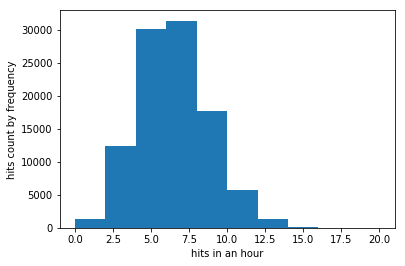

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample=np.random.binomial(60,0.1,100000)
_=plt.hist(sample)
_=plt.xlabel('hits in an hour')
_=plt.ylabel('hits count by frequency')
plt.show()

In [14]:
#Example below will show:

#100 transactions, probablity default rate for each transaction is 5%
#simulate*1000

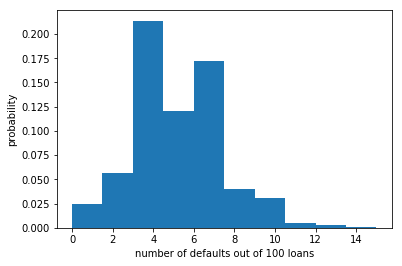

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_defaults=np.empty(10000)

for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)

_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()

### Possion Process

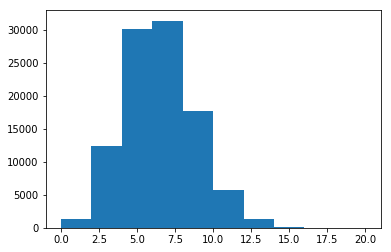

In [3]:
#Only 1 parameter!
#this period is independent with next period
#average hits in a period of time-->n*p(60*0.1)=6
samples_poisson=np.random.poisson(6,10000)#sample*10000
_=plt.hist(sample)
plt.show()

### Normal(Gaussian) Distribution

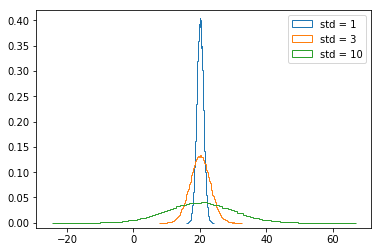

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1=np.random.normal(20,1,100000)
samples_std3=np.random.normal(20,3,100000)
samples_std10=np.random.normal(20,10,100000)

_=plt.hist(samples_std1,normed=True,histtype='step',bins=100)
_=plt.hist(samples_std3,normed=True,histtype='step',bins=100)
_=plt.hist(samples_std10,normed=True,histtype='step',bins=100)

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

In [76]:
#racing time follow normal distribution

In [75]:
#mu,sample get from historical data
mu,sigma=149.22101123595507,1.627816471774816

samples=np.random.normal(mu,sigma,1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob=sum([1 for x in samples if x<144])/len(samples)

print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000695


### Exponential Distrbution

Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, 
and the waiting time between arrivals of a Poisson process is Exponentially distributed.
#rare events的等候时间 满足Exponential Distrbution
#一段时间内rare events，满足Possion Process(one parameter)

In [12]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes.
    tau1 两次rare events平均发生/等候时间(interval time)：ex:750days
    """
    t1 = np.random.exponential(tau1, size=1)#正常到出rare events
    t2 = np.random.exponential(tau2, size=1)#正常到出rare events

    return t1 + t2

In [11]:
successive_poisson(764,715)

array([1015.23367087])

### Bootstrapping/resampling

Imagine you have a data set that has only three points, [-1, 0, 1]. 
If we do boostrapping, the size = len(data) then:

There are 27 unique samples, and the maximum mean is 1.

sample with replacement #有放回的不断从样本抽数(size=len(data))/boostrap sample
when size=100...#扩充了data条数

### Central Limit Theorem

Bootstrap replicates of the mean and the SEM
In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual 
rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the 
Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. 
This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In [21]:
### repeat the period from 1883 to 2015(10000 times),get mean-->boostrapping

In [18]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)#10000
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func) #get 1 resample(boostrapping) and get mean value
    return bs_replicates

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


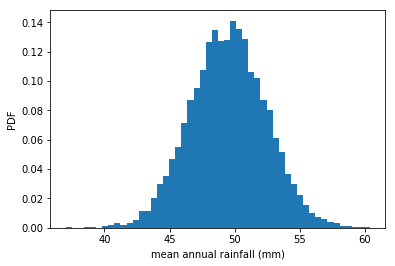

In [23]:
data=np.array([x for x in range(100)])
bs_replicates=draw_bs_reps(data,np.mean,10000)

import matplotlib.pyplot as plt
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [25]:
#confidence interval
[np.percentile(bs_replicates,2.5),np.percentile(bs_replicates,97.5)] #95% confidence interval

[43.87975000000001, 55.15024999999999]

### Hypothesis Test

Null Hypothesis(H0):         u=1.1582 #under the null hypothesis, conduct the trial(right until prove wrong)
Alternative Hypothesis(HA):  u>1.1582 #the one you want to prove

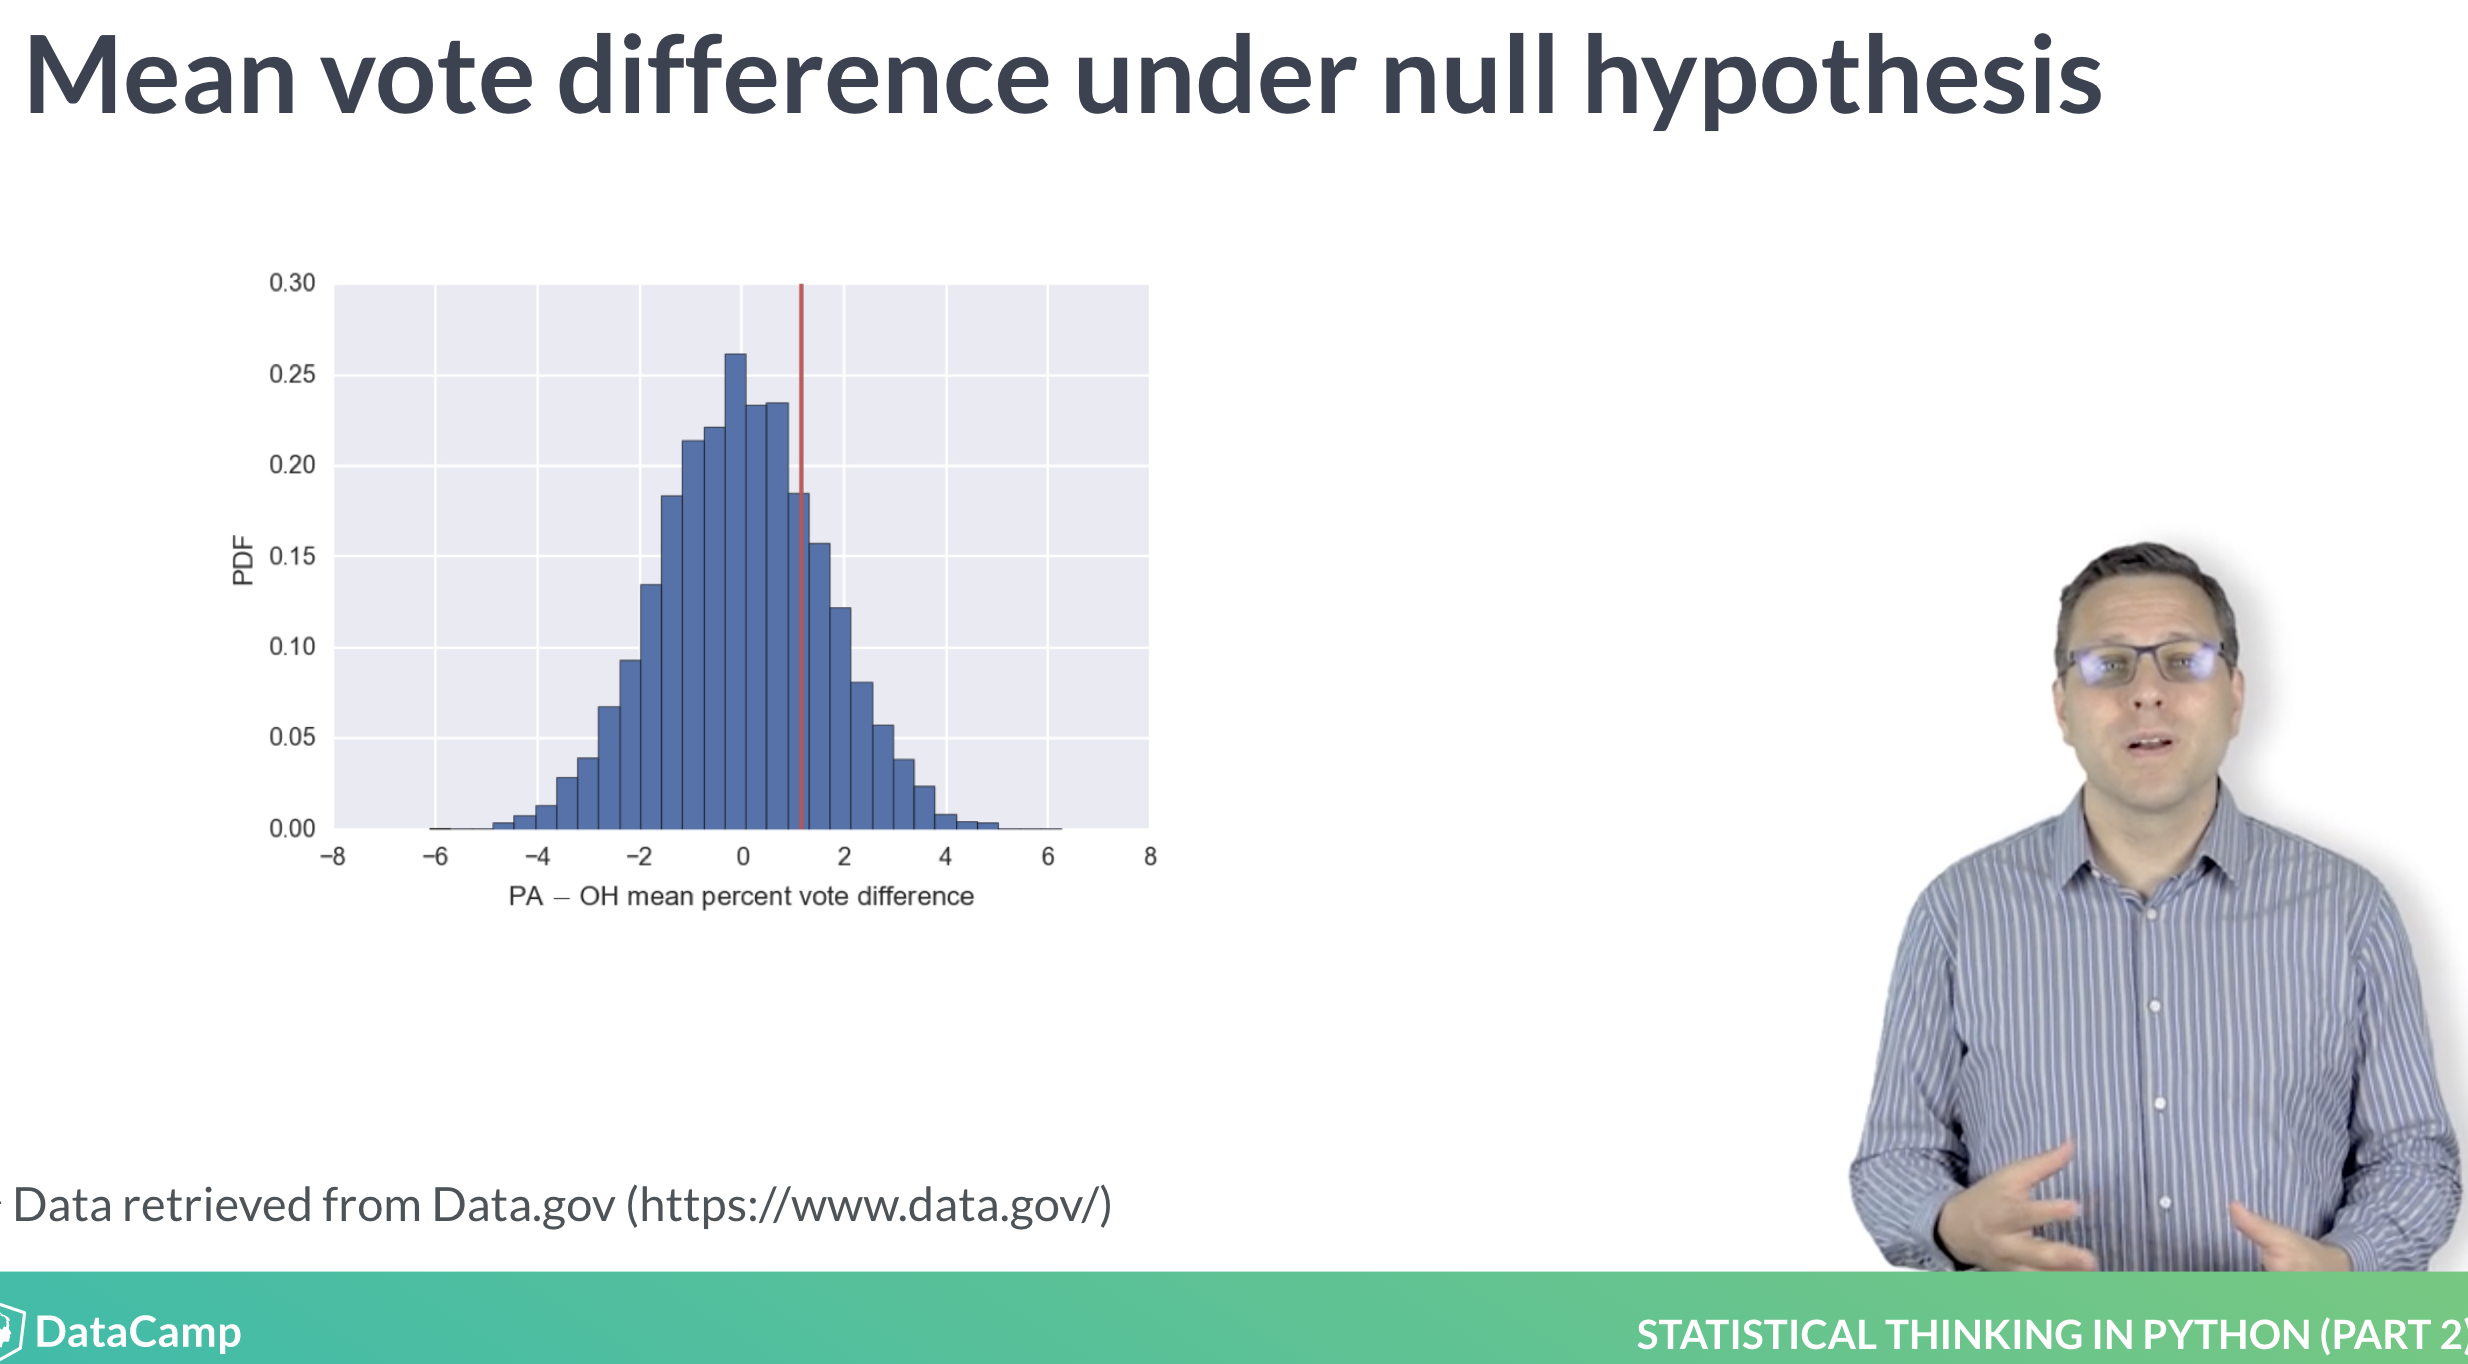

In [14]:
from IPython.display import Image
PATH = "/Users/wty24/Desktop/2020 Fulltime Data Scientist!/MLscreenShot/"
Image(filename = PATH + "HypoTestP_value.png", width=700, height=600)

p value is:
the probability of observing a test statistic equally or more extreme than the one you observed, 
given that the null hypothesis is true.
(if <=0.05,可以接受，reject null hypothesis)

### Permutation

In [9]:
#check two samples distribution similiar?
#permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions

#Q:看Ohio/Penn 分布是否相同？
#A:put two states data together, randomly reorder again--> a new array
#1st part--penn, 2nd part--ohio

In [30]:
def permutation_sample(data1, data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

### AB Testing

In [ ]:
null hypothesis: The test statistic is impervious to change.(unaffected)

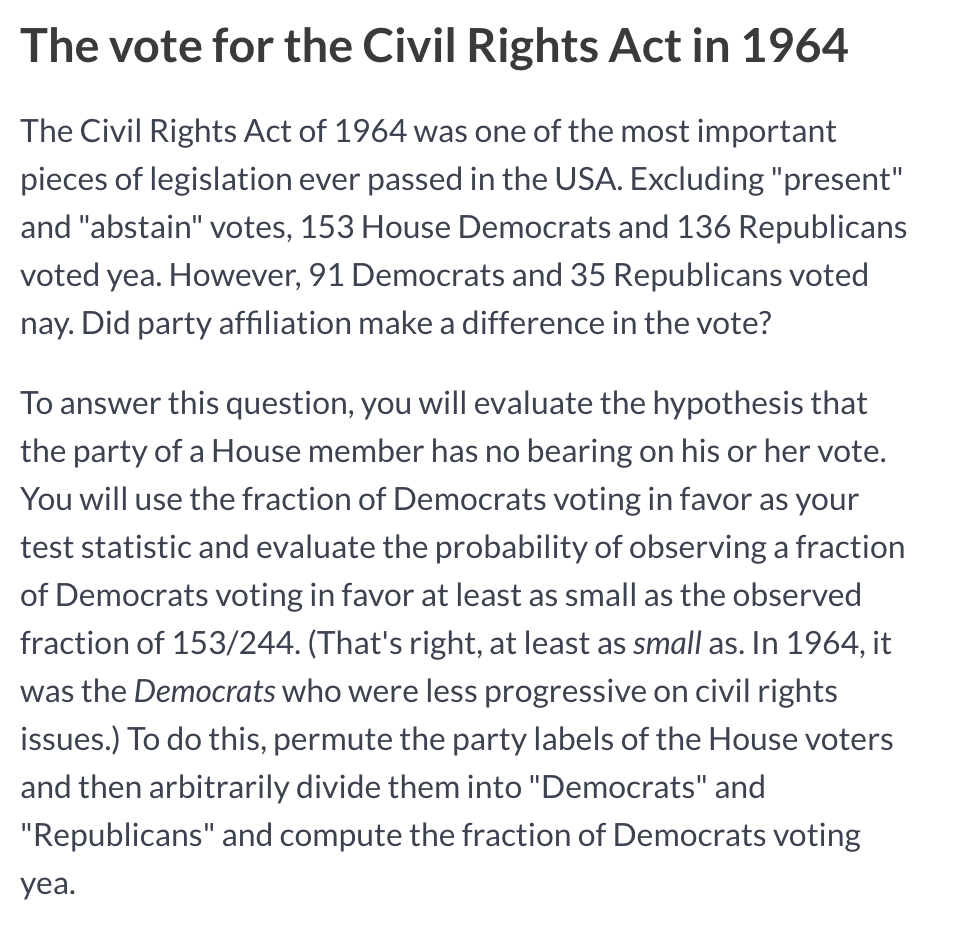

In [19]:
#Example
from IPython.display import Image
PATH = "/Users/wty24/Desktop/2020 Fulltime Data Scientist!/MLscreenShot/"
Image(filename = PATH + "AB_testing_ex.png", width=500, height=100)

H0:投票数的结果it's not related with party: u>154/244     
(因为democrats数小于136/（136+35）,如果上次投票结果与party无关，只是occasiaonly的结果，则之后u>154/244）
HA:it's related with party: u<=154/244

#under null hypothesis, test HA(x<=154/244)
#p=0.0001, reject null hypothesis